In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # Cross-sectional models and methods
from statsmodels.graphics.api import abline_plot # Plots a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # Metrics for evaluating a model's accuracy.
from sklearn.model_selection import train_test_split #  Enables splitting data into train/test sets.
from sklearn import linear_model, preprocessing # packages for linear regression and scaling data sets.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#import data
df = pd.read_csv('pool_data_202211111622.csv_cleaned.csv')

In [3]:
df['time_stamp']=pd.to_datetime(df['time_stamp'],format='%Y-%m-%d %H:%M:%S')

In [4]:
df = df.sort_values(by='time_stamp')
df.head()

,time_stamp,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
39637,2022-11-01 00:00:06.605000-04:00,10001,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
39638,2022-11-01 00:00:16.661000-04:00,10001,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
39639,2022-11-01 00:00:26.768000-04:00,10001,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39640,2022-11-01 00:00:36.834000-04:00,10001,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39641,2022-11-01 00:00:46.936000-04:00,10001,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


In [6]:
df.shape

(43604, 15)

In [5]:
#filter out data with pH ranging from 7.0 - 7.8
newdf = df.loc[(df['PH'] < 7.8) & (df['PH'] > 7.0)]
newdf.head()

,time_stamp,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
39637,2022-11-01 00:00:06.605000-04:00,10001,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
39638,2022-11-01 00:00:16.661000-04:00,10001,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
39639,2022-11-01 00:00:26.768000-04:00,10001,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39640,2022-11-01 00:00:36.834000-04:00,10001,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39641,2022-11-01 00:00:46.936000-04:00,10001,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


In [7]:
newdf.shape

(36649, 15)

In [8]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36649 entries, 39637 to 39636
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time_stamp     36649 non-null  object 
 1   pool_id        36649 non-null  int64  
 2   salinity       36649 non-null  float64
 3   turbidity      36649 non-null  float64
 4   ORP            36649 non-null  float64
 5   PH             36649 non-null  float64
 6   TDS            36649 non-null  float64
 7   Pressure in    36649 non-null  float64
 8   Pressure out   36649 non-null  float64
 9   pump current   36649 non-null  float64
 10  Fresh water    36649 non-null  float64
 11  Drain          36649 non-null  float64
 12  Human Counter  36649 non-null  float64
 13  temperature    36649 non-null  float64
 14  water level    36649 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 4.5+ MB


all these variables aside from the timestamp are continuous numbers. Suitable for regression analysis. Will use pH as the dependent variable to be explored.

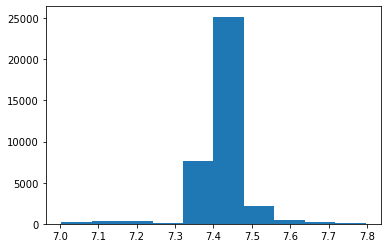

In [9]:
#histogram of the pH variable
pH_hist = plt.hist(newdf['PH'])

In [11]:
#get basic statistical summary of the vairable
newdf['PH'].describe()

count    36649.000000
mean         7.425825
std          0.065941
min          7.003700
25%          7.401800
50%          7.425220
75%          7.454340
max          7.796770
Name: PH, dtype: float64

Desired range is 7.2-7.8 with desired value at 7.6, but can see that water is mostly at a pH of 7.4 

In [13]:
# Call the .corr() method on the dataset 
newdf.corr()

,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
pool_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salinity,NaN,1.000000e+00,-4.692909e-01,7.608453e-03,-1.595581e-01,9.999936e-01,6.384036e-01,6.384250e-01,4.869286e-03,NaN,NaN,-3.417585e-01,8.939172e-13,-4.185860e-02
turbidity,NaN,-4.692909e-01,1.000000e+00,-1.548527e-01,3.584774e-01,-4.692779e-01,-6.567669e-01,-6.578673e-01,1.151758e-02,NaN,NaN,4.355469e-01,6.812348e-15,-4.486755e-01
ORP,NaN,7.608453e-03,-1.548527e-01,1.000000e+00,-1.515313e-01,7.651700e-03,5.167268e-01,5.032603e-01,-2.619884e-02,NaN,NaN,-7.393913e-01,-4.961995e-13,5.428947e-02
PH,NaN,-1.595581e-01,3.584774e-01,-1.515313e-01,1.000000e+00,-1.595315e-01,-3.272647e-01,-3.182616e-01,4.423422e-02,NaN,NaN,3.697189e-01,-6.401505e-12,-6.540564e-01
TDS,NaN,9.999936e-01,-4.692779e-01,7.651700e-03,-1.595315e-01,1.000000e+00,6.384088e-01,6.384326e-01,5.596789e-03,NaN,NaN,-3.417524e-01,9.215689e-13,-4.184988e-02
Pressure in,NaN,6.384036e-01,-6.567669e-01,5.167268e-01,-3.272647e-01,6.384088e-01,1.000000e+00,9.925861e-01,-2.428303e-02,NaN,NaN,-7.177923e-01,1.859065e-11,1.093165e-01
Pressure out,NaN,6.384250e-01,-6.578673e-01,5.032603e-01,-3.182616e-01,6.384326e-01,9.925861e-01,1.000000e+00,-1.217348e-02,NaN,NaN,-7.146217e-01,1.077440e-11,1.128087e-01
pump current,NaN,4.869286e-03,1.151758e-02,-2.619884e-02,4.423422e-02,5.596789e-03,-2.428303e-02,-1.217348e-02,1.000000e+00,NaN,NaN,-7.830838e-03,1.103782e-15,-4.105427e-03
Fresh water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


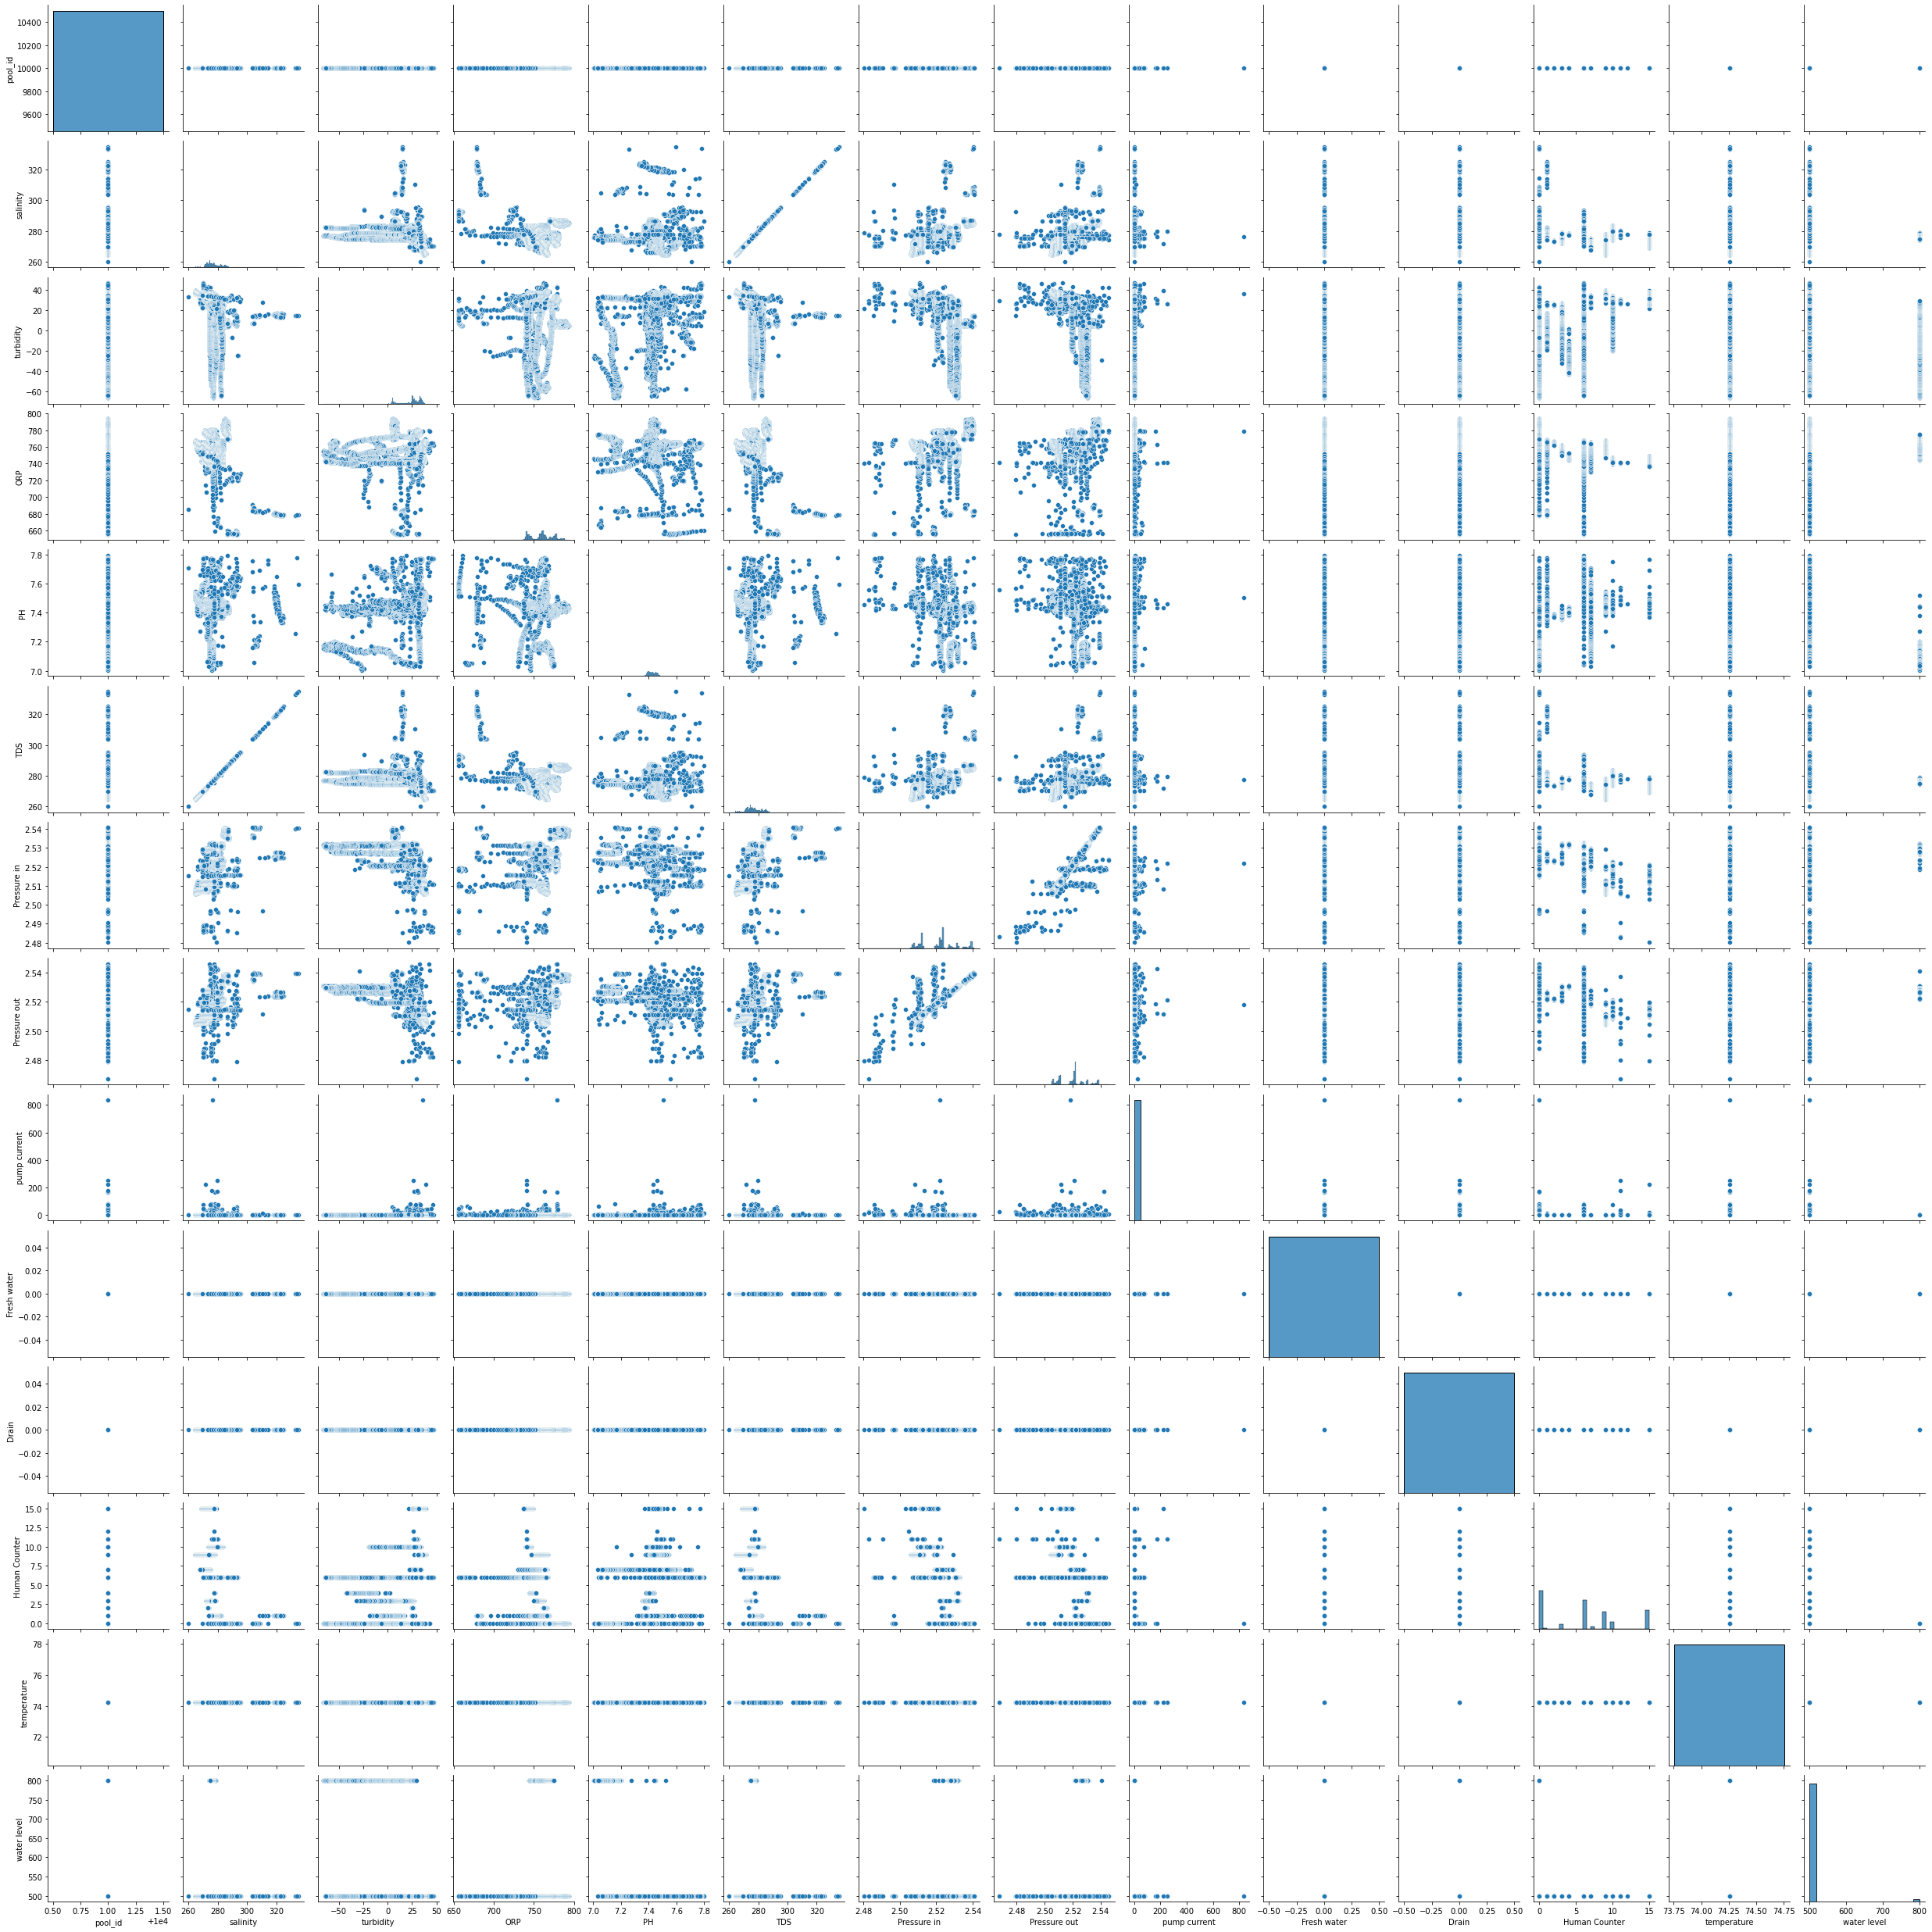

In [14]:
# Make a pairplot of the data
sns.pairplot(newdf)

<AxesSubplot:>

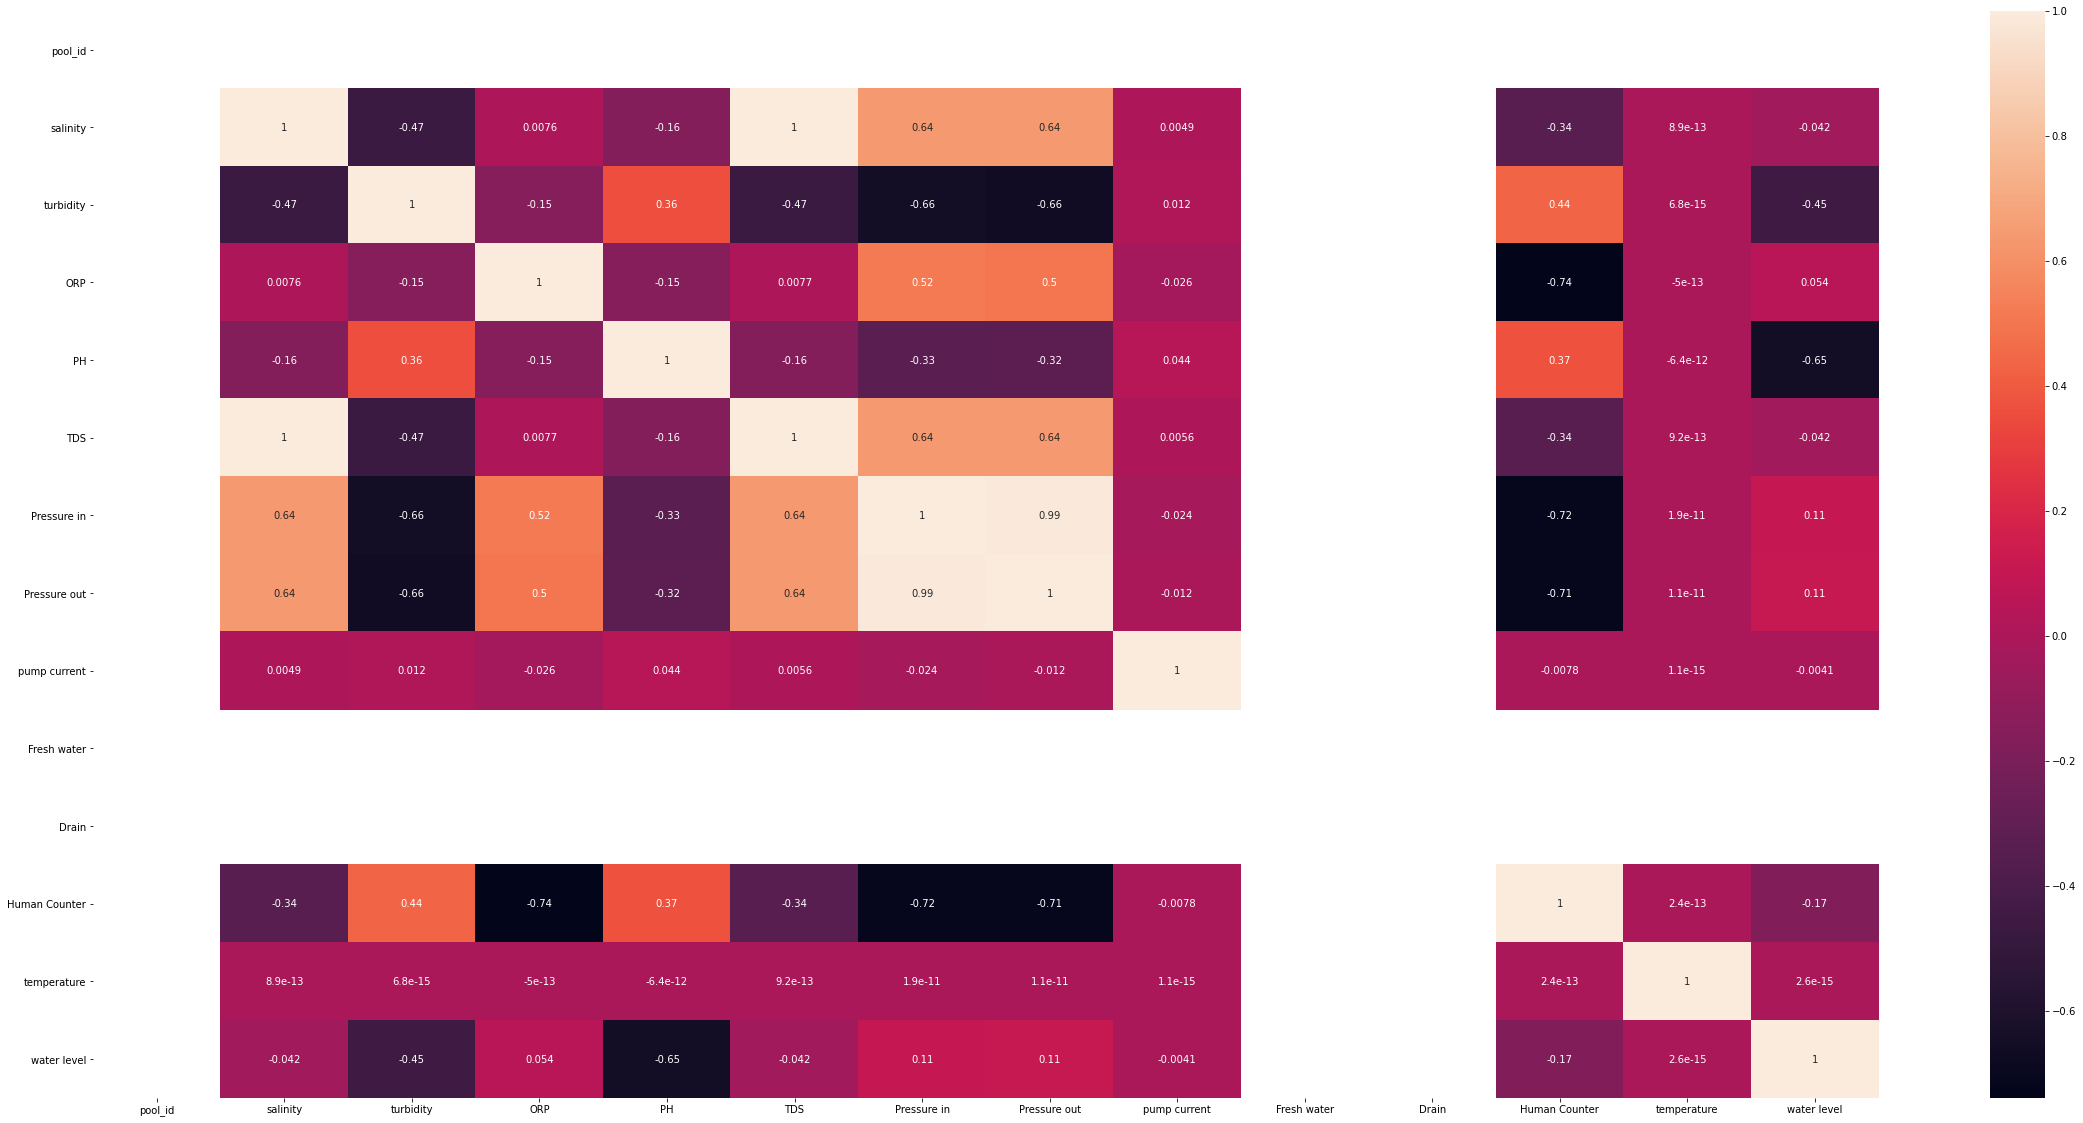

In [15]:
# Make a heatmap of the data 
plt.figure(figsize=(40,20))
sns.heatmap(newdf.corr(), annot =True)

Although not very high (0.36), there is some correlation between pH and turbidity 

<AxesSubplot:xlabel='turbidity', ylabel='PH'>

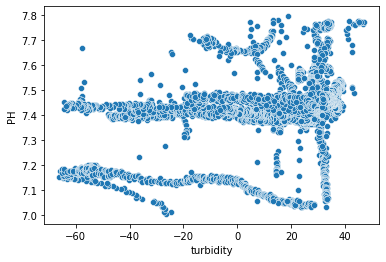

In [18]:
# Plot turbidity against pH
sns.scatterplot(x='turbidity', y='PH', data =newdf)

turbidity shows water clarity in NTU (Nephelometric Turbidity Units). Per the Fields info sheet: normal range is <50 NTU and 5 NTU is perfect. Not much of a correlation :(

<AxesSubplot:xlabel='turbidity', ylabel='PH'>

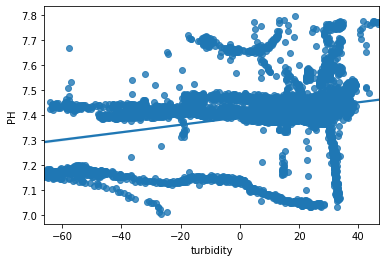

In [23]:
# Call the regplot method on your sns object, with parameters: x = 'turbidity', y = 'PH'
sns.regplot(x = 'turbidity', y = 'PH', data =newdf)

## Modeling

#### Train test split

In [25]:
# Subsetting our data into our dependent and independent variables.
# Create a variable called 'X' and assign it the density field of wine.
# Create a variable called 'y' (that's right, lower case) and assign it the fixed.acidity field of wine. 
# Using double brackets allows us to use the column headings. 
X = newdf[['turbidity']]
y= newdf[['PH']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
# The random_state parameter allows our work to be checked and replicated by other data scientists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [26]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27486, 1) (27486, 1)
(9163, 1) (9163, 1)


#### First Model: Linear Regression

In [27]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
# Note: the normalize=True parameter enables the handling of different scales of our variables.
rModel= linear_model.LinearRegression(normalize=True)

In [28]:
# We now want to train the model on our test data.
# Call the .fit() method of rModel, and plug in X-train, y_train as parameters, in that order.
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [29]:
# Evaluate the model  
rModel.score(X_train, y_train)

0.11924461813910481

The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 11% of the variation from the mean.

In [30]:
# Use the model to make predictions about our test data
# Make a variable called y_pred, and assign it the result of calling the predict() method on rModel. Plug X_test into that method.
y_pred = rModel.predict(X_test)

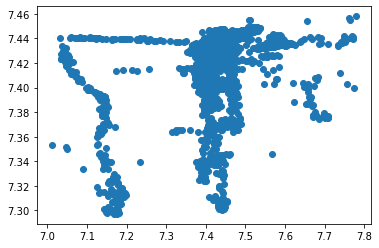

In [31]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test,y_pred )

The above scatterplot represents how well the predictions match the actual results.

Along the x-axis, we have the actual pH, and along the y-axis we have the predicted value for the pH.

Not much we can get from this :(

#### Second Model: Ordinary Least Squares (OLS)

In [32]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X = newdf[['turbidity']]

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
# Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
X= sm.add_constant(X)

In [35]:
# The rest of the preparation is as before.
y= newdf[['PH']]

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [36]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [37]:
# Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PH   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3721.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:37:47   Log-Likelihood:                 37643.
No. Observations:               27486   AIC:                        -7.528e+04
Df Residuals:                   27484   BIC:                        -7.527e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3928      0.001   1.12e+04      0.000       7.391       7.394
turbidity      0.0015   2.38e-05     61.000      0.000       0.001       0.002
==============================================================================
Omnibus:                     7282.517   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206049.951
Skew:                          -0.670   Prob(JB):                         0.00
Kurtosis:                      16.346   Cond. No.                         49.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_predict = rModel2_results.predict(X_test) 

Text(0, 0.5, 'Predicted pH')

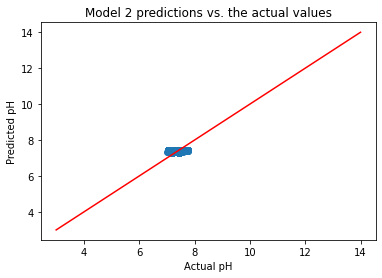

In [39]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_predict)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(3,15)],[x for x in range(3,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")

The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that they don't match the red line at all :( 

To get a better predictive model, we should use more than one variable.

#### Third Model: Multiple Linear Regression
Including more than one explanatory variable into a linear regression analysis

In [40]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except pH and pool_id and time_stamp (which are object & integer)
X = newdf.drop(['time_stamp', 'PH', 'pool_id' ],axis=1)

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = newdf[["PH"]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [41]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel3 = sm.OLS(y_train, X_train)

# Fit the model
rModel3_results = rModel3.fit()

In [42]:
# Evaluate the model
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PH   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3608.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:47:56   Log-Likelihood:                 46620.
No. Observations:               27486   AIC:                        -9.322e+04
Df Residuals:                   27476   BIC:                        -9.314e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
salinity         -0.0061      0.013     -0.476      0.634      -0.031       0.019
turbidity        -0.0011    2.8e-05    -41.014      0.000      -0.001      -0.001
ORP               0.0012   3.16e-05     36.664      0.000       0.001       0.001
TDS               0.0062      0.013      0.477      0.633      -0.019       0.031
Pressure in      -7.3275      0.238    -30.772      0.000      -7.794      -6.861
Pressure out      5.0623      0.234     21.650      0.000       4.604       5.521
pump current      0.0004   4.58e-05      8.752      0.000       0.000       0.000
Fresh water    1.351e-15   8.41e-17     16.058      0.000    1.19e-15    1.52e-15
Drain         -1.693e-16   4.95e-18    -34.200      0.000   -1.79e-16    -1.6e-16
Human Counter     0.0042   9.73e-05     42.778      0.000       0.004       0.004
temperature       0.1724      0.002     88.410      0.000       0.169       0.176
water level      -0.0011   7.58e-06   -140.384      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    17067.144   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           657418.574
Skew:                           2.412   Prob(JB):                         0.00
Kurtosis:                      26.469   Cond. No.                     2.19e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.7e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R-Squared shows that this model predicts around 54% of the variation, still not very high 

In [43]:
# Use our new model to make predictions
y_predict = rModel3_results.predict(X_test) 

Text(0, 0.5, 'Predicted pH')

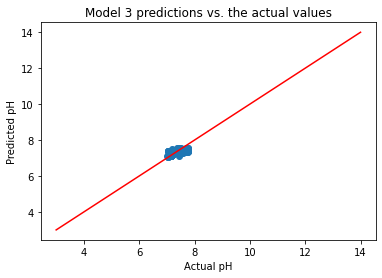

In [44]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_predict)

# Add a line for perfect correlation
plt.plot([x for x in range(3,15)],[x for x in range(3,15)], color='red')

# Label it nicely
plt.title("Model 3 predictions vs. the actual values")
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")

We can check another metric as well - the RMSE (Root Mean Squared Error).  This is a measure of the accuracy of a regression model. Very simply put, it's formed by finding the average difference between predictions and actual values.

In [45]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [48]:
# Get predictions from rModel3
y_pred = rModel3_results.predict(X_test)

# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(y_test)
matches.rename(columns = {'PH':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

0.0424973799789952

The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.04 signifies that we are, on average, about 0.04 of a unit of pH away from the correct answer.